In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [30]:
### reading csv file 
data_1=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )

data_1.iloc[121:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [31]:
#dropping rows having region name and headers
data_1.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
data_1.reset_index(inplace=True)
data_1.drop('index', axis=1, inplace=True)

data_1.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [32]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
data_1.loc[:122,'Region']=0
data_1.loc[122:, 'Region']=1

data_1.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


In [33]:
# here it is visible that all datatypes are in object 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [35]:
data_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,244,31,27,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,244,4,08,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,244,1,2012,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,244,19,35,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,244,62,64,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,244,18,14,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,244,39,0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,244,173,88.9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,244,166,7.9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,244,198,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [10]:

data_1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [36]:
data_1.columns= [col_name.strip() for col_name in dataset.columns]
data_1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [37]:
data_1=dataset.astype(str)

In [38]:
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    data_1[feature]= data_1[feature].str.replace(" ","")

In [39]:
data_1[dataset['FWI']== 'fire'].index

Int64Index([], dtype='int64')

In [41]:
data_1.loc[165,'FWI']=' 0.1'

In [42]:
data_1[data_1['Classes']== 'nan'].index
data_1.loc[165,'Classes']='fire'

In [43]:
data_1['Classes']=data_1['Classes'].str.replace('notfire','0')
data_1['Classes']=data_1['Classes'].str.replace('fire','1')

In [44]:

datatypes_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 
                 'Classes':'int64', 'Region':'float64'}

data_1=data_1.astype(datatypes_convert)
data_1.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [45]:
data_1.shape

(244, 15)

In [46]:
data_1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [47]:
categorical_feature=[feature for feature in data_1.columns if data_1[feature].dtypes=='O']


for feature in categorical_feature:
    print(data_1.groupby(feature)['Region'].value_counts())

<AxesSubplot:xlabel='Classes', ylabel='count'>

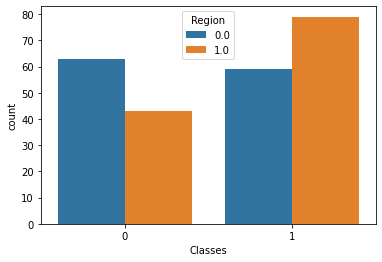

In [48]:
sns.countplot(data=data_1, x='Classes', hue='Region')

In [49]:
numerical_features=[feature for feature in data_1.columns if data_1[feature].dtypes!='O']
print(numerical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [50]:
data_1[numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [51]:
discrete_features=[feature for feature in numerical_features if len(data_1[feature].unique())<35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

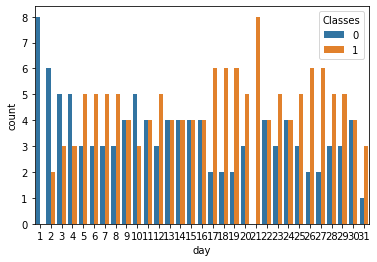

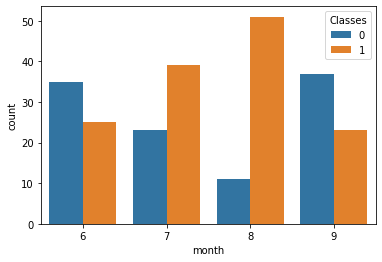

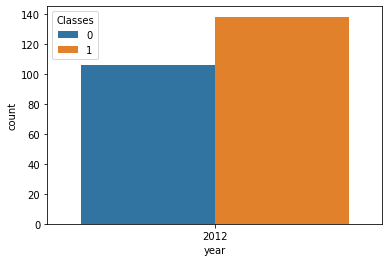

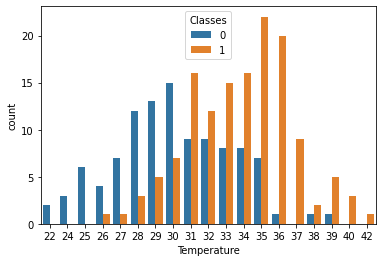

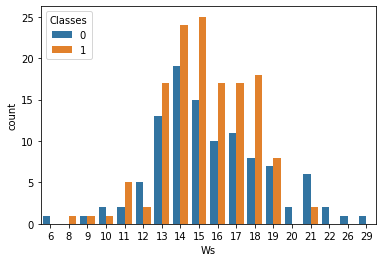

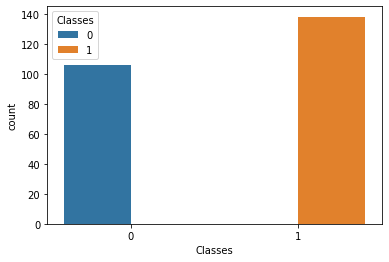

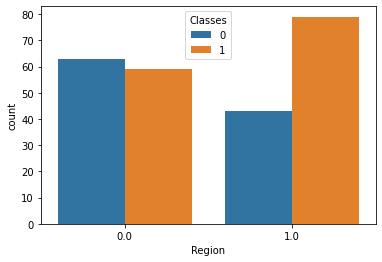

In [52]:
for feature in discrete_features:
    sns.countplot(data=data_1, x=feature, hue='Classes')
    plt.show()

In [53]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


### 2.3.2.1 Distribution of Continuous Numerical Features

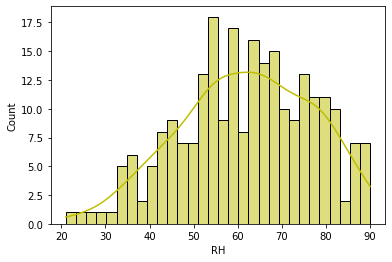

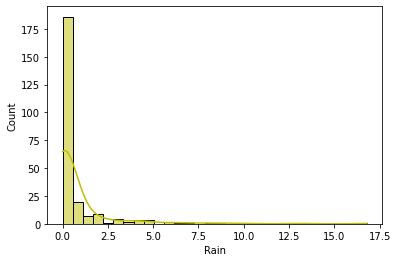

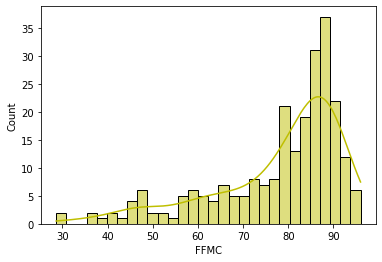

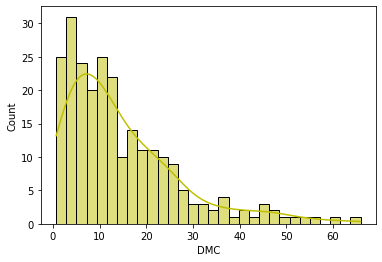

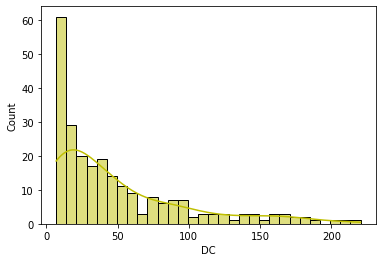

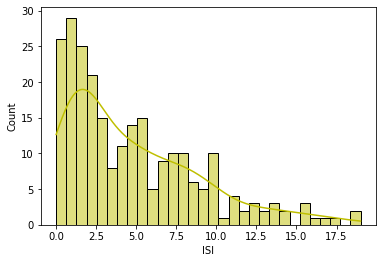

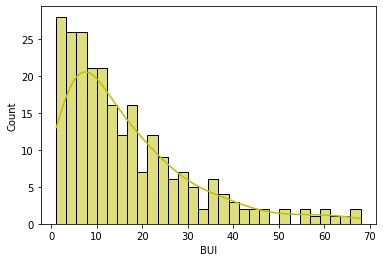

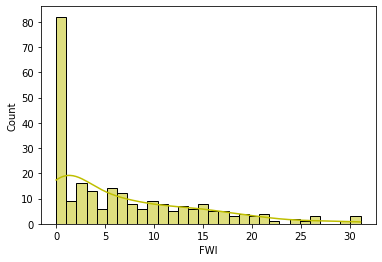

In [55]:
### Checking distribution of Continuous numerical features

for feature in continuous_features:
    sns.histplot(data=data_1, x=feature,kde=True, bins=30, color='y')
    plt.show();

## Observations
1. Relative humidity is following gaussian distribution.
2. Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).
3. FFMC feature follows left skwed distribution.

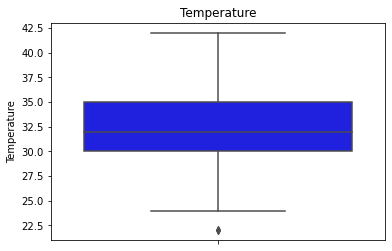

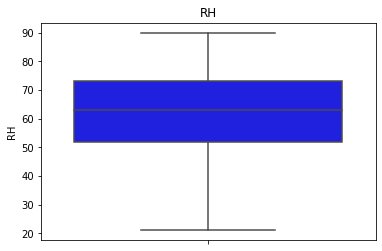

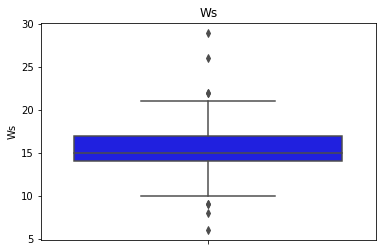

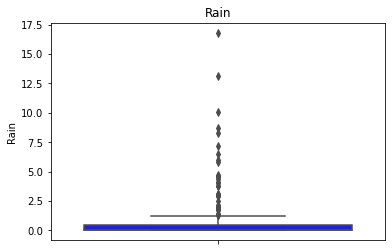

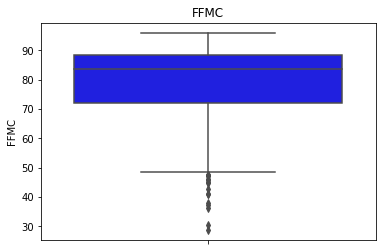

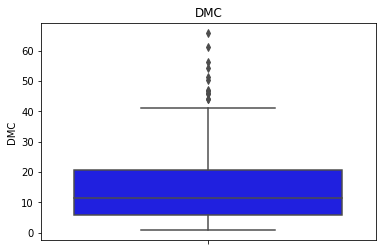

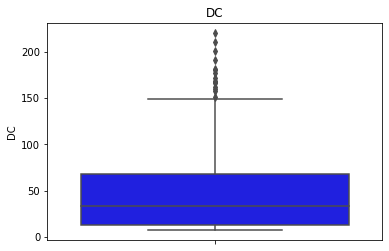

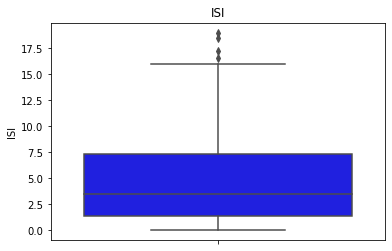

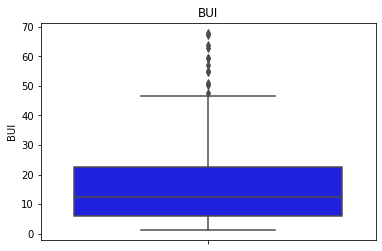

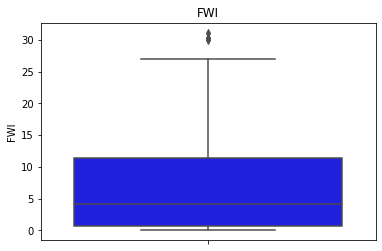

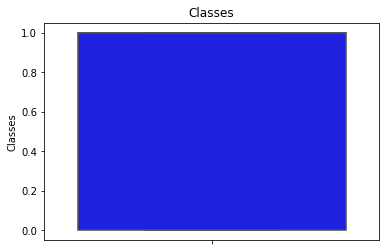

In [56]:

for feature in [feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]:
    sns.boxplot(data=data_1, y= feature, color='blue')
    plt.title(feature)
    plt.show();

In [57]:
data= round(data_1[[feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


<AxesSubplot:>

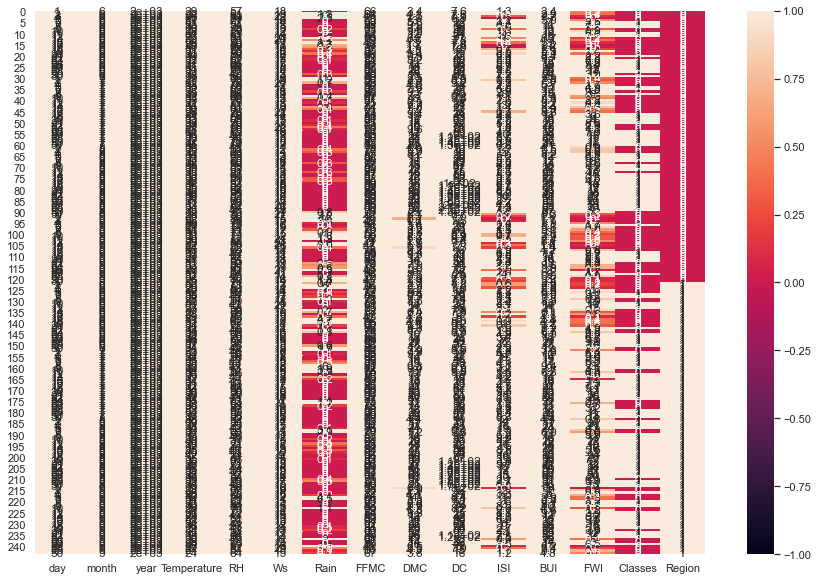

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data_1, annot=True,  vmin=-1, vmax=1)

<AxesSubplot:xlabel='day', ylabel='Temperature'>

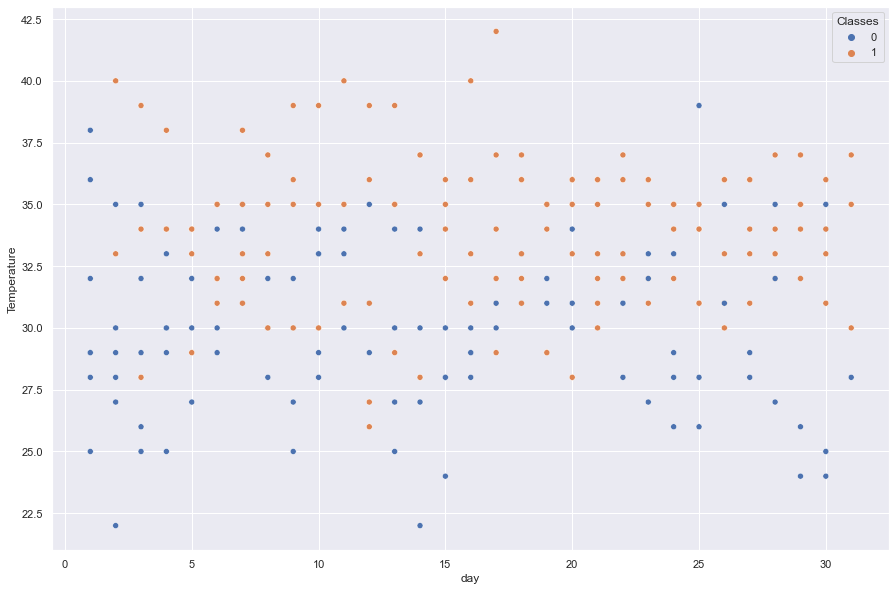

In [59]:
sns.scatterplot(data=data_1, x='day', y='Temperature', hue='Classes')

<AxesSubplot:xlabel='month', ylabel='Temperature'>

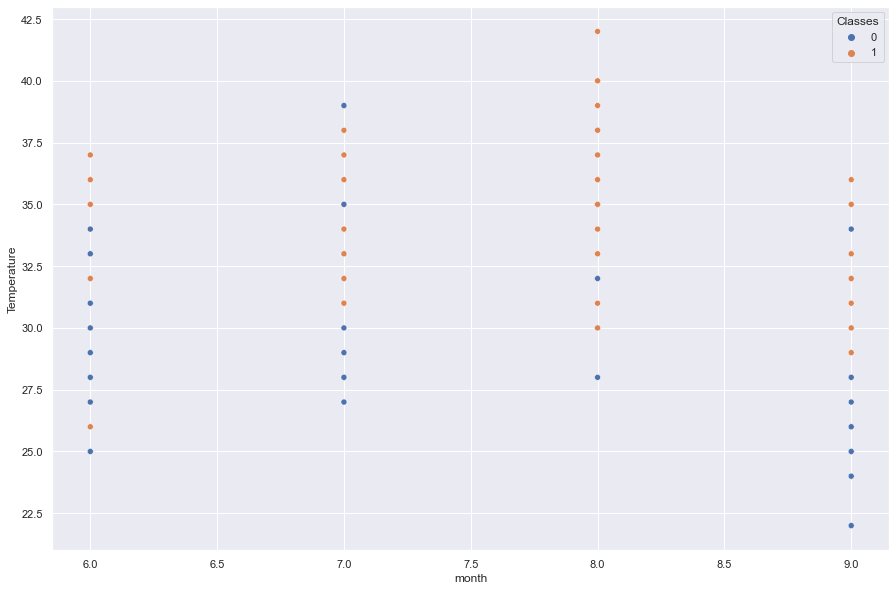

In [61]:
sns.scatterplot(data=data_1, x='month', y='Temperature', hue='Classes' )

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

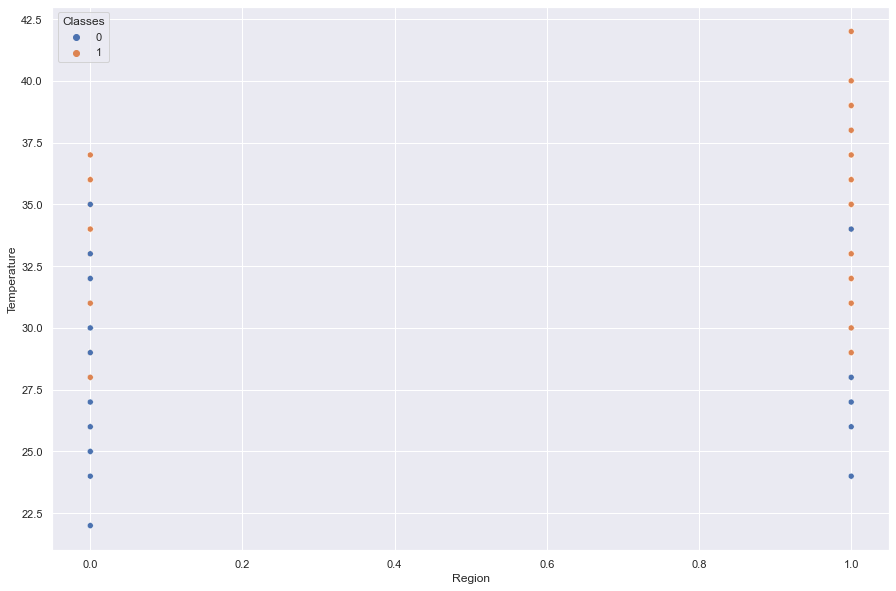

In [62]:
sns.scatterplot(data=data_1, x='Region', y='Temperature', hue='Classes')

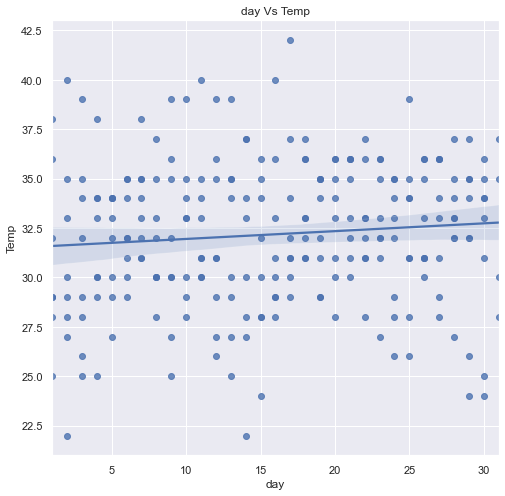

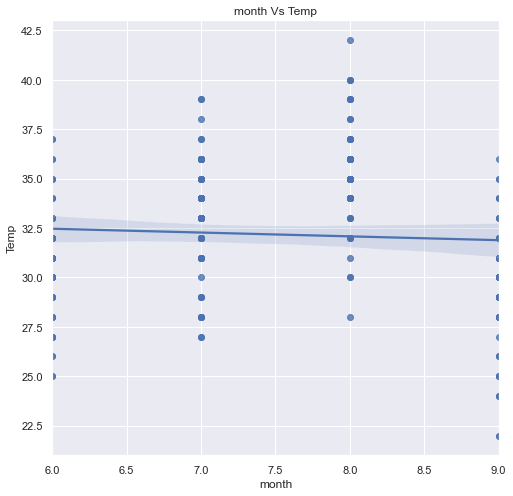

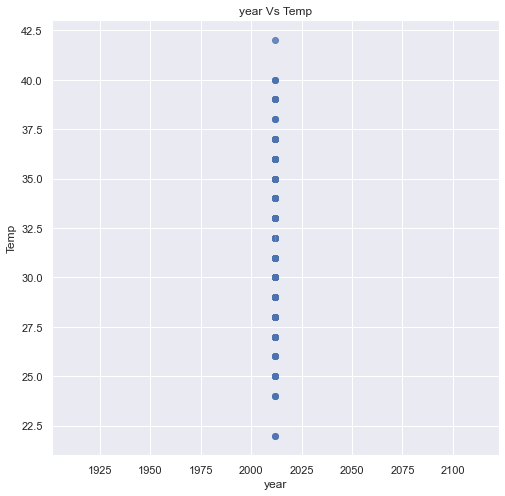

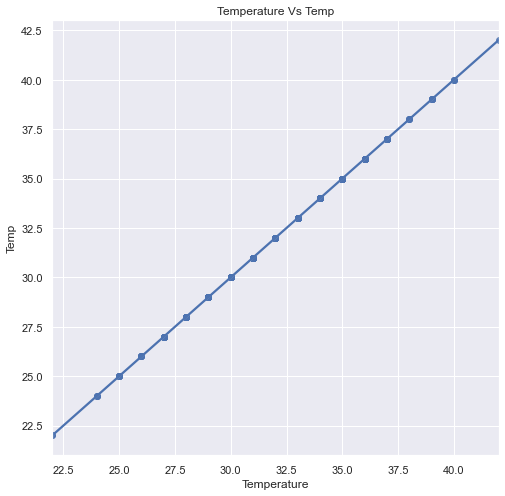

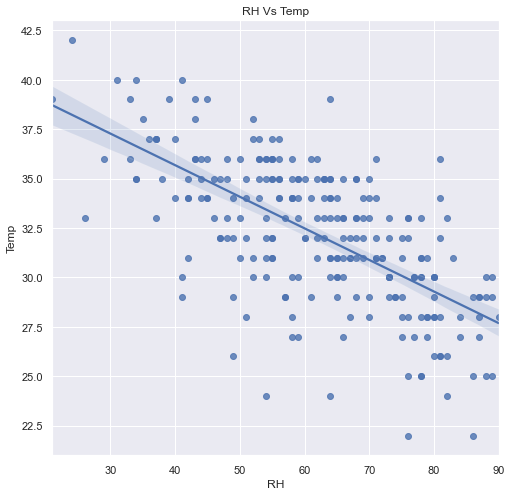

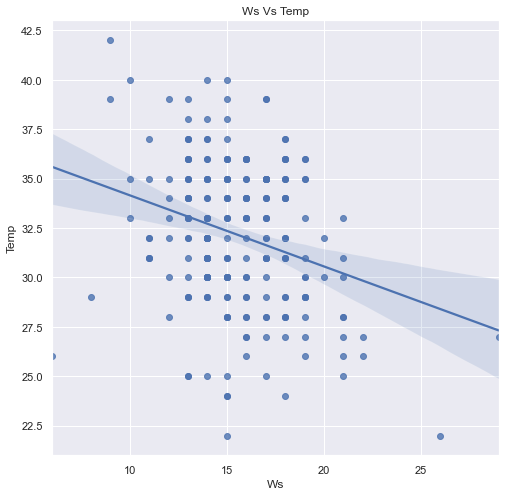

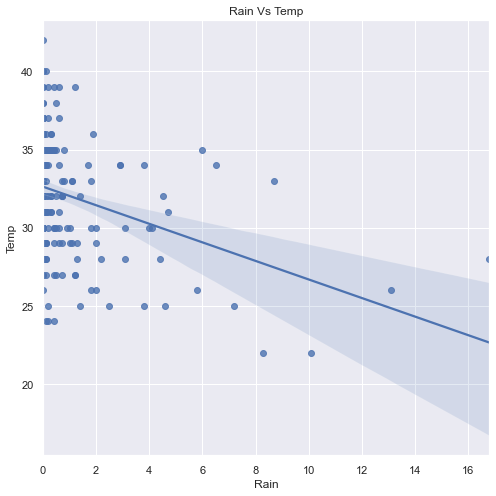

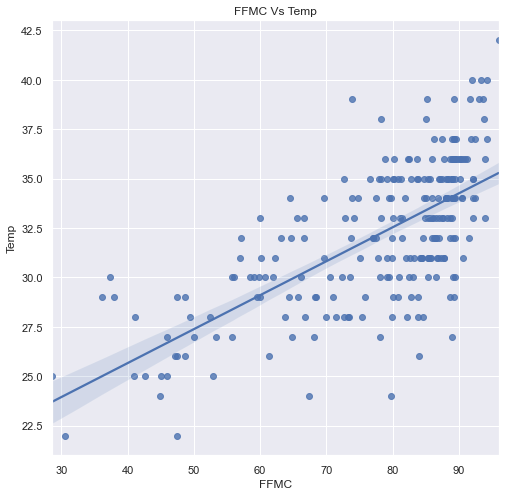

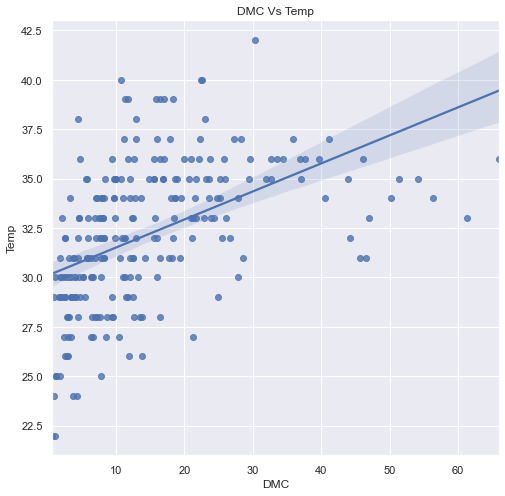

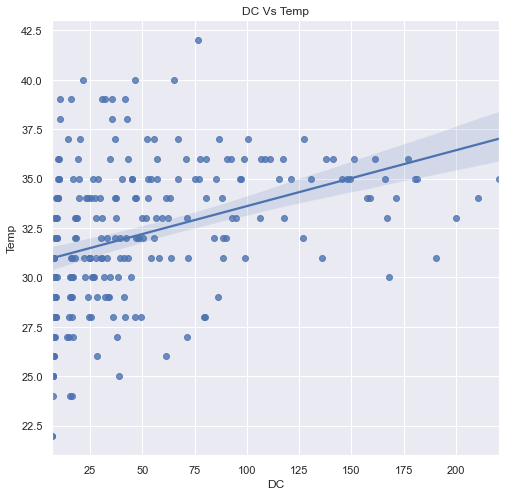

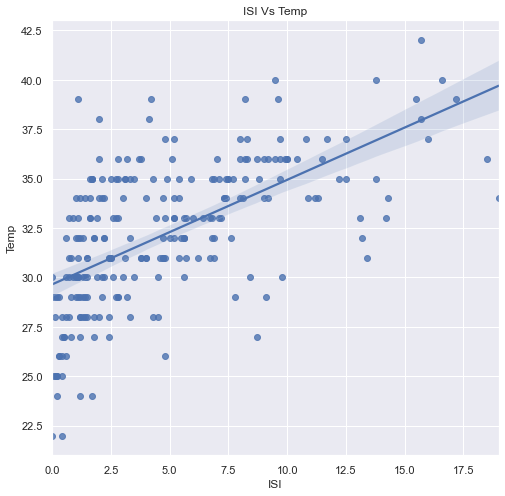

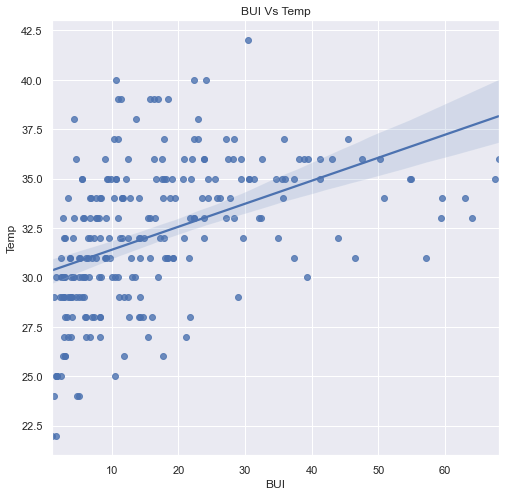

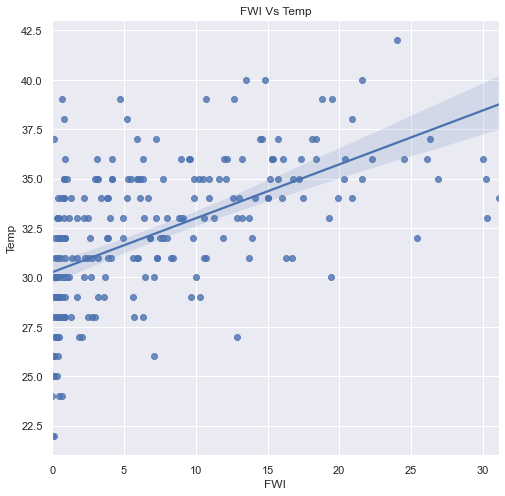

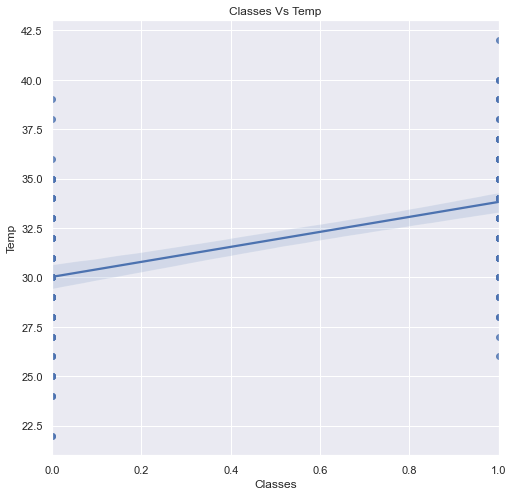

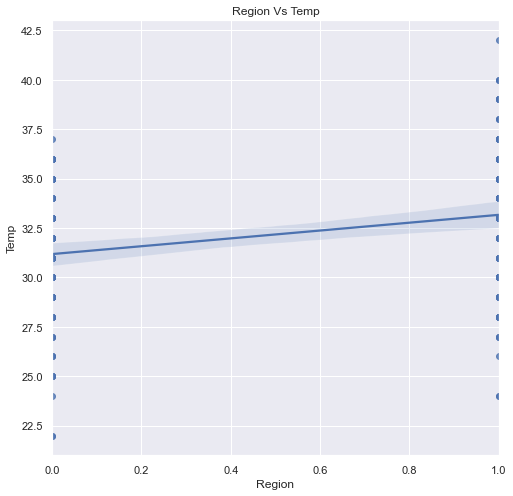

In [64]:
for feature in [feature for feature in data_1.columns if feature not in ['Temp']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=data_1[feature], y=data_1['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temp")
    plt.title("{} Vs Temp".format(feature))
    plt.show();

In [65]:
data_1.drop('year', axis=1, inplace=True)

In [66]:
data_1['Temp']=data_1['Temperature']

In [67]:
data_1.drop('Temperature', axis=1, inplace=True)

In [68]:
data_1.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27


In [69]:
X= data_1.iloc[:,:-1]
y=data_1.iloc[:,-1]

In [70]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [71]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

###  Splitting data into Training and Test data

In [72]:

from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [75]:
y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [76]:
X_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [77]:
y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [78]:
X_train.shape, y_train.shape

((163, 13), (163,))

In [79]:

X_test.shape, y_test.shape

((81, 13), (81,))

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:

scaler=StandardScaler()
scaler

StandardScaler()

In [82]:

X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 , -0.60257784, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.14460201, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472, -1.41768313, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.89178186, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238, -0.39880152, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.9597073 , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [83]:

X_test=scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.07667657, ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472, -0.60257784, ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238, -1.01013048, ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238, -1.01013048, ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.07667657, ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472, -0.5346524 , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:

linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [86]:

linear_reg.fit(X_train, y_train)

LinearRegression()

In [87]:

print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
  0.08345626]
2. Intercept of best fit hyper plane is 31.98159509202454


In [88]:
linear_reg_pred=linear_reg.predict(X_test)
linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

Text(0, 0.5, 'Predicted data')

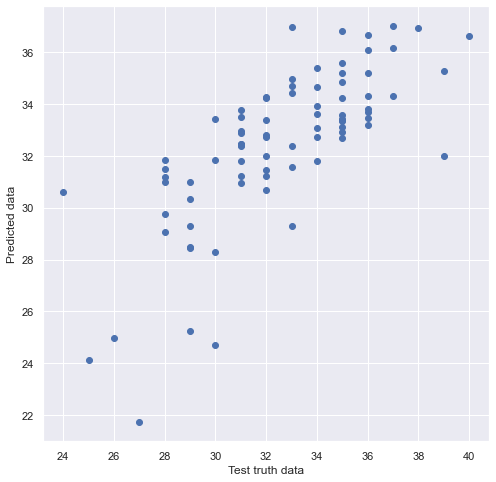

In [89]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [90]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg.head()

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
Name: Temp, dtype: float64

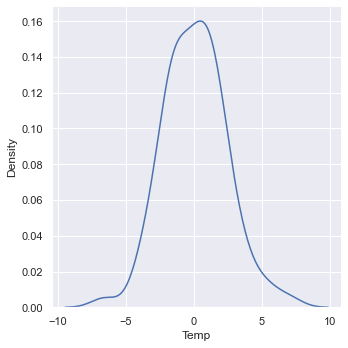

In [91]:
sns.displot(x=residual_linear_reg, kind='kde')

Text(0, 0.5, 'Residuals')

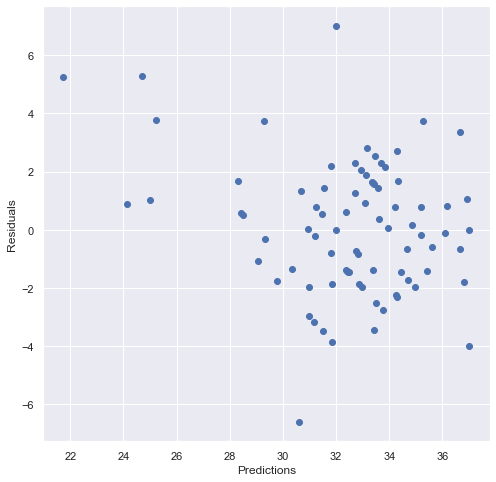

In [92]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [94]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, linear_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, linear_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root Mean squared error is 2.29


In [95]:
from sklearn.metrics import r2_score

In [96]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
print("Our Linear regression model has {} % accuracy".format(round(linear_reg_r2_score*100,3)))

linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

Our Linear regression model has 51.089 % accuracy
Adjusted R square accuracy is 41.6 percent


In [97]:
from sklearn.linear_model import Ridge

In [98]:
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [99]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [100]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [-0.61752995 -0.3207458  -0.98218457 -0.55467826  0.21315492  1.84131702
  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793 -0.24063909
  0.09187935]
2. Intercept of best fit hyper plane is 31.98159509202454


In [101]:
ridge_reg_pred=ridge_reg.predict(X_test)
ridge_reg_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

Text(0, 0.5, 'Predicted data')

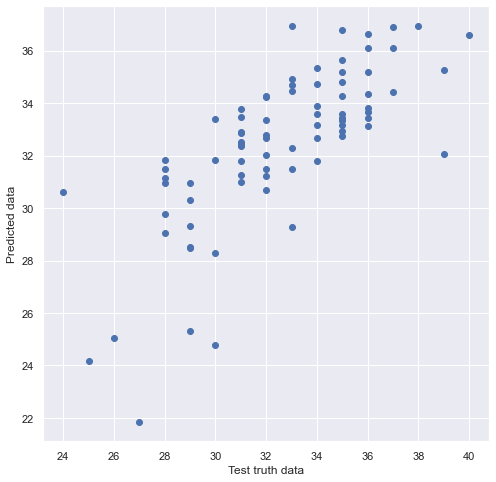

In [102]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [103]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg.head()

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
Name: Temp, dtype: float64

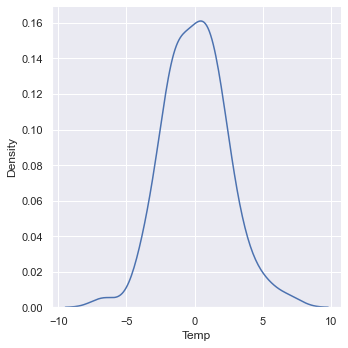

In [104]:
sns.displot(x=residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

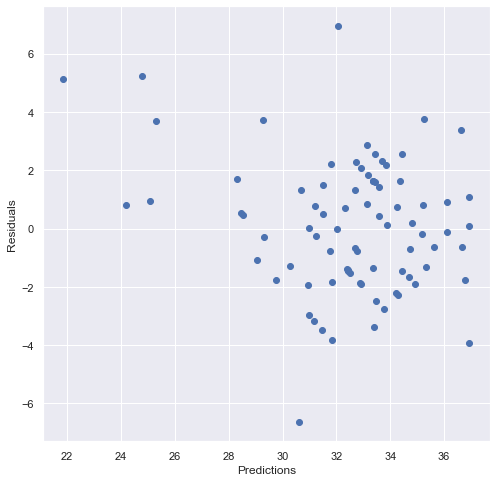

In [105]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [106]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)))

Mean squared error is 5.19
Mean absolute error is 1.8
Root Mean squared error is 2.28


In [107]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
print("Our Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))

ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(ridge_reg_adj_r2_score*100,2)))

Our Ridge regression model has 51.709 % accuracy
Adjusted R square accuracy is 42.34 percent


In [108]:
from sklearn.linear_model import Lasso

In [109]:
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [110]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [111]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
2. Intercept of best fit hyper plane is 31.98159509202454


In [112]:
lasso_reg_pred=lasso_reg.predict(X_test)
lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

Text(0, 0.5, 'Predicted data')

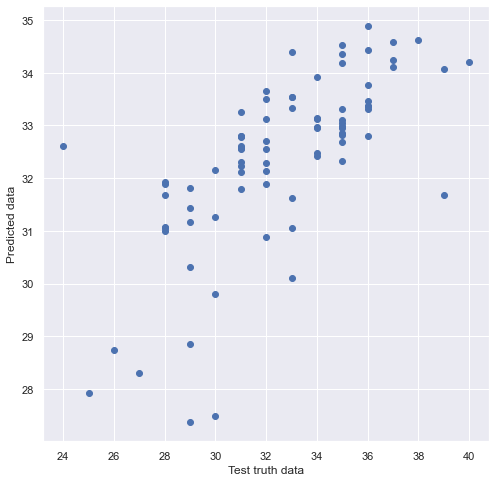

In [113]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [114]:
residual_lasso_reg=y_test-lasso_reg_pred
residual_lasso_reg.head()

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
Name: Temp, dtype: float64

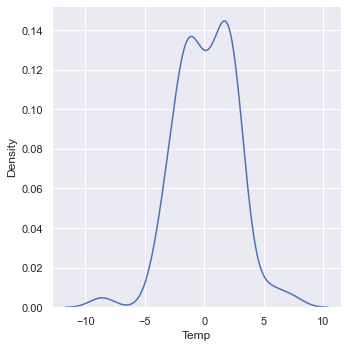

In [115]:
sns.displot(x=residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

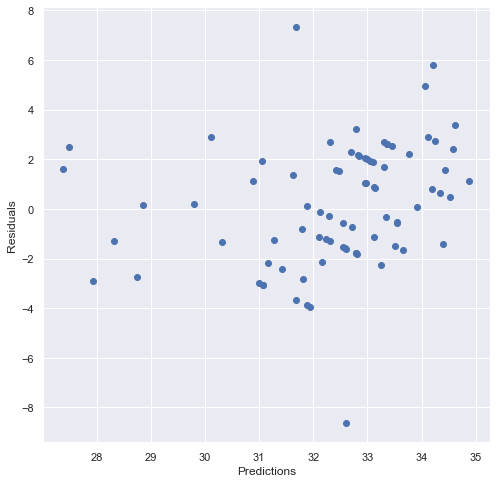

In [116]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [117]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)))

Mean squared error is 6.09
Mean absolute error is 2.0
Root Mean squared error is 2.47


In [118]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print("Our Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))

lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(lasso_reg_adj_r2_score*100,2)))

Our Lasso regression model has 43.342 % accuracy
Adjusted R square accuracy is 32.35 percent


In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [121]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [122]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.         -0.         -0.68808933 -0.10544712 -0.00834786  0.85162206
  0.10376148  0.          0.23158765  0.02547021  0.15362153  0.07372069
  0.        ]
2. Intercept of best fit hyper plane is 31.98159509202454


In [123]:
elastic_reg_pred=elastic_reg.predict(X_test)
elastic_reg_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

Text(0, 0.5, 'Predicted data')

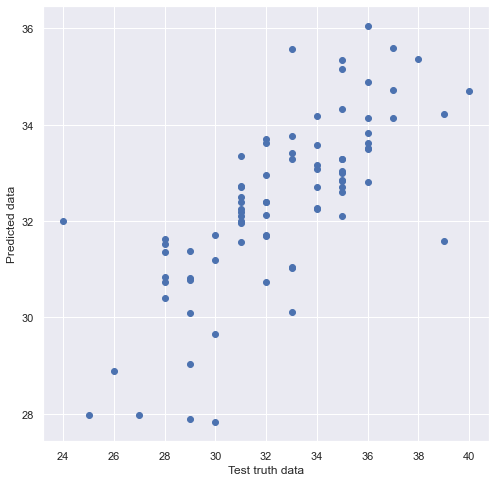

In [124]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [126]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg.head()

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
Name: Temp, dtype: float64

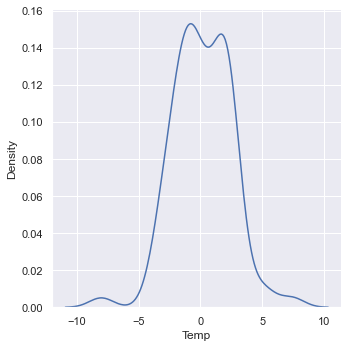

In [127]:
sns.displot(x=residual_elastic_reg, kind='kde')

In [125]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

NameError: name 'residual_elastic_reg' is not defined

In [128]:
print("Mean squared error is '{}'".format(round(mean_squared_error(y_test, elastic_reg_pred),2)))
print("Mean absolute error is '{}'".format(round(mean_absolute_error(y_test, elastic_reg_pred),2)))
print("Root Mean squared error is '{}'".format(round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

Mean squared error is '5.39'
Mean absolute error is '1.85'
Root Mean squared error is '2.32'


In [129]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print("Our Elastic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))

elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(elastic_reg_adj_r2_score*100,2)))

Our Elastic-Net regression model has 49.812 % accuracy
Adjusted R square accuracy is 40.07 percent


In [130]:
print("MSE for Linear Regression Model is '{}'\nMSE for Ridge Regression Model is '{}'\nMSE for Lasso Regression Model is '{}'\nMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_squared_error(y_test, linear_reg_pred),2), round(mean_squared_error(y_test, ridge_reg_pred),2),
             round(mean_squared_error(y_test, lasso_reg_pred),2), round(mean_squared_error(y_test, elastic_reg_pred),2)))

MSE for Linear Regression Model is '5.25'
MSE for Ridge Regression Model is '5.19'
MSE for Lasso Regression Model is '6.09'
MSE for Elastic-Net Regression Model is '5.39'



In [131]:
print("MAE for Linear Regression Model is '{}'\nMAE for Ridge Regression Model is '{}'\nMAE for Lasso Regression Model is '{}'\nMAE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_absolute_error(y_test, linear_reg_pred),2), round(mean_absolute_error(y_test, ridge_reg_pred),2),
             round(mean_absolute_error(y_test, lasso_reg_pred),2), round(mean_absolute_error(y_test, elastic_reg_pred),2)))

MAE for Linear Regression Model is '1.81'
MAE for Ridge Regression Model is '1.8'
MAE for Lasso Regression Model is '2.0'
MAE for Elastic-Net Regression Model is '1.85'



In [132]:
print("RMSE for Linear Regression Model is '{}'\nRMSE for Ridge Regression Model is '{}'\nRMSE for Lasso Regression Model is '{}'\nRMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2),
             round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

RMSE for Linear Regression Model is '2.29'
RMSE for Ridge Regression Model is '2.28'
RMSE for Lasso Regression Model is '2.47'
RMSE for Elastic-Net Regression Model is '2.32'



In [133]:
print("Accuracy of Linear Regression Model is '{}'\nAccuracy of Ridge Regression Model is '{}'\nAccuracy of Lasso Regression Model is '{}'\nAccuracy of Elastic-Net Regression Model is '{}'\n".format(
round(linear_reg_r2_score*100,3), round(ridge_reg_r2_score*100,3), round(lasso_reg_r2_score*100,3), round(elastic_reg_r2_score*100,3)))

Accuracy of Linear Regression Model is '51.089'
Accuracy of Ridge Regression Model is '51.709'
Accuracy of Lasso Regression Model is '43.342'
Accuracy of Elastic-Net Regression Model is '49.812'



In [134]:
print("Adjusted R Square accuracy for Linear Regression Model is '{}'\nAdjusted R Square accuracy for Ridge Regression Model is '{}'\nAdjusted R Square accuracy for Lasso Regression Model is '{}'\nAdjusted R Square accuracy for Elastic-Net Regression Model is '{}'\n".format(
round(linear_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(elastic_reg_adj_r2_score*100,3)))

Adjusted R Square accuracy for Linear Regression Model is '41.599'
Adjusted R Square accuracy for Ridge Regression Model is '42.339'
Adjusted R Square accuracy for Lasso Regression Model is '42.339'
Adjusted R Square accuracy for Elastic-Net Regression Model is '40.074'

